In [124]:
import numpy as np
import math
import sys
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib

# 1. Compute the similarity between the different embedding files

### 1.1 Retrieve the necessary embeddings and lexicon

In [2]:
''' Read all the word vectors and normalize them '''
def read_word_vecs(filename):
  """
  - input: name of the file containing the word vectors
  """
  wordVectors = {}
  with open(filename, 'r', encoding='utf-8') as fileObject:
    first_line = True
    for line in fileObject:
      line = line.strip().lower()
      # Skip the first line
      if first_line:
        first_line =False
        continue
      # The first word is assumed to be the word itself, and the remaining words are assumed to be the components of the word vector
      word = line.split()[0]
      # initialize a numpy array of zeros with the same length as the word vector
      wordVectors[word] = np.zeros(len(line.split())-1, dtype=float)
      for index, vecVal in enumerate(line.split()[1:]):
        # assign the values in the numpy array to the corresponding components of the word vector
        wordVectors[word][index] = float(vecVal)
      ''' normalize weight vector '''
      # divide each element by the square root of the sum of the squares of all the elements in the array
      # plus a small constant (1e-6) to avoid division by zero
      wordVectors[word] /= math.sqrt((wordVectors[word]**2).sum() + 1e-6)
  
  # standard error indicating that the vectors have been read from the file 
  sys.stderr.write("Vectors read from: "+filename+" \n")
  return wordVectors

In [32]:
# Load pre_trained word embeddings
# ENGLISH
EN_file_non_ret = read_word_vecs("../data/English/wordEmbeddings/vectors_datatxt_250_sg_w10_i5_c500_gensim_clean")
# FRENCH
FR_file_non_ret_50 = read_word_vecs("../data/French/word_embeddings/vecs50-linear-frwiki")
FR_file_non_ret_100 = read_word_vecs("../data/French/word_embeddings/vecs100-linear-frwiki")

# Load retrofitted word embeddings
# ENGLISH
EN_file_ret =read_word_vecs("../data/English/output_vectors/output_vectors.txt")
# FRENCH
FR_file_ret_100 = read_word_vecs("../data/French/output_vectors/output_vectors100.txt")
FR_file_ret_50 = read_word_vecs("../data/French/output_vectors/output_vectors50.txt")

Vectors read from: /Users/Iness/Library/CloudStorage/OneDrive-UniversitédeParis/Semestre 2/Projet TAL/Fichier FINAL/data/English/wordEmbeddings/vectors_datatxt_250_sg_w10_i5_c500_gensim_clean 
Vectors read from: /Users/Iness/Library/CloudStorage/OneDrive-UniversitédeParis/Semestre 2/Projet TAL/Fichier FINAL/data/French/word_embeddings/vecs50-linear-frwiki 
Vectors read from: /Users/Iness/Library/CloudStorage/OneDrive-UniversitédeParis/Semestre 2/Projet TAL/Fichier FINAL/data/French/word_embeddings/vecs100-linear-frwiki 
Vectors read from: /Users/Iness/Library/CloudStorage/OneDrive-UniversitédeParis/Semestre 2/Projet TAL/output_vectors_EN/output_vectors.txt 
Vectors read from: /Users/Iness/Library/CloudStorage/OneDrive-UniversitédeParis/Semestre 2/Projet TAL/Fichier FINAL/data/French/output_vectors/output_vectors100.txt 
Vectors read from: /Users/Iness/Library/CloudStorage/OneDrive-UniversitédeParis/Semestre 2/Projet TAL/Fichier FINAL/data/French/output_vectors/output_vectors50.tx

In [5]:
#ENGLISH

#open english lexical_similarity file
lex_sim_eng = open ("../data/English/evaluations/lexical similarity/ws353_lexical_similarity.txt", 'r')
#list of word pairs from the lexical similarity file
word_pairs_eng = []
#list of human scores for each word pair
hum_score_eng = []

#for every line in the file
for line in lex_sim_eng:
    #split the line by space
    #one line contains the word pair and its score
    w1, w2, score = line.split()
    #add the words to word_pairs
    word_pairs_eng.append((w1, w2))
    #add the ratings to human_score
    hum_score_eng.append(score)

In [ ]:
print(word_pairs_eng[0])
print(hum_score_eng[0])

In [6]:
#FRENCH

#open lexical_similarity file
lex_sim_fre = open ("../data/French/lexicon/rg65_french.txt", 'r')
#list of word pairs from the lexical similarity file
word_pairs_fre = []
#list of human scores for each word pair
hum_score_fre = []
#open lexical_similarity file

#for every line in the file
for line in lex_sim_fre:
    #split the line by space
    #one line contains the word pair and its score
    w1, w2, score = line.split()
    #add the words to word_pairs
    word_pairs_fre.append((w1, w2))
    #add the ratings to human_score
    hum_score_fre.append(score)

In [37]:
print(word_pairs_fre[0])
print(hum_score_fre[0])

('corde', 'sourire')
0.0


### 1.2 Compute cosine similarity for non-retrofitted vectors

In [7]:
#ENGLISH

#list of cosine similarities between non-retrofitted vectors
cos_non_ret_eng = []

#for every word pair
for w1, w2 in word_pairs_eng:
    #check if the words exist in the word_embeddings
    if w1 in EN_file_non_ret and w2 in EN_file_non_ret:
        #retrieve word1's vector 
        vec1 = EN_file_non_ret[w1]
        #retreive word2's vector
        vec2 = EN_file_non_ret[w2]
        #calculate cosine between the two vectors
        similarity = 1 - cosine(vec1, vec2)
        #add the result to scores
        cos_non_ret_eng.append(round(similarity, 2))
    #otherwise if words don't exist in the word embeddings
    else:
        #assign default value of 0.0
        cos_non_ret_eng.append(0.00)        

In [8]:
#FRENCH

#list of cosine similarities between non-retrofitted vectors
cos_non_ret_fre_100 = []

#for every word pair
for w1, w2 in word_pairs_fre:
    #check if the words exist in the word_embeddings
    if w1 in FR_file_non_ret_100 and w2 in FR_file_non_ret_100:
        #retrieve word1's vector 
        vec1 = FR_file_non_ret_100[w1]
        #retreive word2's vector
        vec2 = FR_file_non_ret_100[w2]
        #calculate cosine between the two vectors
        similarity = 1 - cosine(vec1, vec2)
        #add the result to scores
        cos_non_ret_fre_100.append(round(similarity, 2))
    #otherwise if words don't exist in the word embeddings
    else:
        #assign default value of 0.0
        cos_non_ret_fre_100.append(0.00)        

In [26]:
#FRENCH

#list of cosine similarities between non-retrofitted vectors
cos_non_ret_fre_50 = []

#for every word pair
for w1, w2 in word_pairs_fre:
    #check if the words exist in the word_embeddings
    if w1 in FR_file_non_ret_50 and w2 in FR_file_non_ret_50:
        #retrieve word1's vector 
        vec1 = FR_file_non_ret_50[w1]
        #retreive word2's vector
        vec2 = FR_file_non_ret_50[w2]
        #calculate cosine between the two vectors
        similarity = 1 - cosine(vec1, vec2)
        #add the result to scores
        cos_non_ret_fre_50.append(round(similarity, 2))
    #otherwise if words don't exist in the word embeddings
    else:
        #assign default value of 0.0
        cos_non_ret_fre_50.append(0.00)        

In [27]:
print(hum_score_eng)
print(cos_non_ret_eng)

[6.77, 7.35, 10.0, 7.46, 7.62, 7.58, 5.77, 6.31, 7.5, 6.77, 7.42, 6.85, 6.19, 5.92, 7.0, 6.62, 6.81, 4.62, 5.81, 7.08, 8.08, 1.62, 1.31, 0.92, 1.81, 6.69, 3.73, 0.92, 7.46, 8.12, 7.73, 9.15, 0.31, 0.23, 8.58, 5.92, 6.69, 8.46, 7.65, 1.62, 9.44, 8.62, 9.03, 6.81, 6.63, 7.56, 6.73, 7.65, 2.5, 8.38, 7.38, 6.19, 6.73, 7.92, 8.12, 7.35, 4.88, 5.54, 8.46, 8.13, 3.04, 1.31, 5.96, 6.87, 7.85, 2.65, 8.94, 8.96, 9.29, 8.83, 9.1, 8.87, 9.02, 9.29, 8.79, 7.52, 7.1, 7.38, 6.46, 6.27, 2.69, 4.46, 5.85, 5.0, 2.08, 4.42, 4.38, 1.85, 3.08, 0.92, 3.15, 0.92, 0.54, 2.08, 0.54, 0.62, 8.42, 9.08, 9.04, 8.27, 7.57, 7.29, 8.5, 7.73, 6.88, 5.65, 3.31, 8.0, 8.0, 7.08, 6.85, 7.0, 4.77, 5.62, 5.87, 8.08, 7.0, 6.85, 7.42, 6.58, 6.42, 8.21, 7.69, 7.23, 6.71, 5.58, 7.48, 8.45, 8.06, 8.08, 8.02, 8.11, 7.92, 7.94, 5.85, 3.85, 2.81, 6.65, 2.5, 1.77, 6.04, 6.58, 6.85, 2.4, 2.92, 3.69, 2.15, 7.25, 5.0, 1.92, 5.9, 7.42, 7.27, 1.81, 5.06, 5.09, 6.78, 6.06, 6.94, 8.31, 4.59, 2.94, 5.63, 8.16, 7.53, 4.56, 6.34, 6.56, 2.38, 

In [29]:
print(hum_score_fre)
print(cos_non_ret_fre_100)

[0.0, 0.0, 0.06, 0.11, 0.0, 0.0, 0.06, 0.0, 0.0, 0.22, 0.22, 0.44, 0.06, 0.17, 0.17, 0.5, 0.22, 0.11, 0.33, 0.39, 0.29, 0.06, 0.17, 0.44, 0.17, 0.61, 0.11, 0.28, 0.06, 2.17, 0.56, 0.28, 0.44, 0.33, 0.22, 0.56, 0.56, 0.94, 2.0, 0.83, 1.28, 1.65, 2.41, 2.78, 2.89, 3.28, 2.78, 2.67, 2.94, 3.33, 3.39, 1.5, 1.89, 2.59, 3.56, 2.5, 3.72, 3.0, 4.0, 3.83, 3.0, 4.0, 3.94, 3.22, 2.17]
[0.47, 0.18, 0.4, 0.2, 0.24, 0.28, 0.37, 0.08, 0.35, 0.44, 0.22, 0.56, 0.35, 0.19, 0.27, 0.51, 0.44, 0.3, 0.54, 0.33, 0.1, 0.2, 0.17, 0.5, 0.38, 0.34, 0.44, 0.23, 0.4, 0.31, 0.11, 0.45, 0.48, 0.21, 0.26, 0.51, 0.32, 0.31, 0.46, 0.21, 0.16, 0.43, 0.5, 0.4, 0.64, 0.53, 0.36, 0.71, 0.19, 0.51, 0.32, 0.44, 0.33, 0.55, 0.28, 0.25, 0.67, 0.57, 1, 0.55, 0.6, 1, 0.51, 0.46, 0.02]


In [28]:
print(hum_score_fre)
print(cos_non_ret_fre_50)

[0.0, 0.0, 0.06, 0.11, 0.0, 0.0, 0.06, 0.0, 0.0, 0.22, 0.22, 0.44, 0.06, 0.17, 0.17, 0.5, 0.22, 0.11, 0.33, 0.39, 0.29, 0.06, 0.17, 0.44, 0.17, 0.61, 0.11, 0.28, 0.06, 2.17, 0.56, 0.28, 0.44, 0.33, 0.22, 0.56, 0.56, 0.94, 2.0, 0.83, 1.28, 1.65, 2.41, 2.78, 2.89, 3.28, 2.78, 2.67, 2.94, 3.33, 3.39, 1.5, 1.89, 2.59, 3.56, 2.5, 3.72, 3.0, 4.0, 3.83, 3.0, 4.0, 3.94, 3.22, 2.17]
[0.59, 0.19, 0.51, 0.26, 0.26, 0.34, 0.44, 0.14, 0.47, 0.56, 0.2, 0.71, 0.47, 0.26, 0.48, 0.61, 0.68, 0.41, 0.65, 0.42, 0.14, 0.24, 0.24, 0.58, 0.48, 0.45, 0.57, 0.29, 0.48, 0.44, 0.21, 0.55, 0.51, 0.21, 0.38, 0.61, 0.5, 0.41, 0.55, 0.27, 0.14, 0.53, 0.6, 0.61, 0.77, 0.52, 0.43, 0.8, 0.15, 0.62, 0.44, 0.54, 0.36, 0.72, 0.22, 0.43, 0.69, 0.66, 1, 0.72, 0.66, 1, 0.56, 0.53, 0.15]


### 1.3 Compute cosine similarity for retrofitted vectors

In [33]:
#ENGLISH

#list of cosine similarities between retrofitted vectors
cos_ret_eng = []

#for every word pair
for w1, w2 in word_pairs_eng:
    #check if the words exist in the word_embeddings
    if w1 in EN_file_ret and w2 in EN_file_ret:
        #retrieve word1's vector 
        vec1 = EN_file_ret[w1]
        #retreive word2's vector
        vec2 = EN_file_ret[w2]
        #calculate cosine between the two vectors
        similarity = 1 - cosine(vec1, vec2)
        #add the result to scores
        cos_ret_eng.append(round(similarity, 2))
    #otherwise if words don't exist in the word embeddings
    else:
        #assign default value of 0.0
        cos_ret_eng.append(0.00)        

In [34]:
#FRENCH

#list of cosine similarities between retrofitted vectors
cos_ret_fre_100 = []

#for every word pair
for w1, w2 in word_pairs_fre:
    #check if the words exist in the word_embeddings
    if w1 in FR_file_ret_100 and w2 in FR_file_ret_100:
        #retrieve word1's vector 
        vec1 = FR_file_ret_100[w1]
        #retreive word2's vector
        vec2 = FR_file_ret_100[w2]
        #calculate cosine between the two vectors
        similarity = 1 - cosine(vec1, vec2)
        #add the result to scores
        cos_ret_fre_100.append(round(similarity, 2))
    #otherwise if words don't exist in the word embeddings
    else:
        #assign default value of 0.0
        cos_ret_fre_100.append(0.00)        

In [35]:
#FRENCH

#list of cosine similarities between retrofitted vectors
cos_ret_fre_50 = []

#for every word pair
for w1, w2 in word_pairs_fre:
    #check if the words exist in the word_embeddings
    if w1 in FR_file_ret_50 and w2 in FR_file_ret_50:
        #retrieve word1's vector 
        vec1 = FR_file_ret_50[w1]
        #retreive word2's vector
        vec2 = FR_file_ret_50[w2]
        #calculate cosine between the two vectors
        similarity = 1 - cosine(vec1, vec2)
        #add the result to scores
        cos_ret_fre_50.append(round(similarity, 2))
    #otherwise if words don't exist in the word embeddings
    else:
        #assign default value of 0.0
        cos_ret_fre_50.append(0.00)        

In [30]:
print(hum_score_eng)
print(cos_ret_eng)

[6.77, 7.35, 10.0, 7.46, 7.62, 7.58, 5.77, 6.31, 7.5, 6.77, 7.42, 6.85, 6.19, 5.92, 7.0, 6.62, 6.81, 4.62, 5.81, 7.08, 8.08, 1.62, 1.31, 0.92, 1.81, 6.69, 3.73, 0.92, 7.46, 8.12, 7.73, 9.15, 0.31, 0.23, 8.58, 5.92, 6.69, 8.46, 7.65, 1.62, 9.44, 8.62, 9.03, 6.81, 6.63, 7.56, 6.73, 7.65, 2.5, 8.38, 7.38, 6.19, 6.73, 7.92, 8.12, 7.35, 4.88, 5.54, 8.46, 8.13, 3.04, 1.31, 5.96, 6.87, 7.85, 2.65, 8.94, 8.96, 9.29, 8.83, 9.1, 8.87, 9.02, 9.29, 8.79, 7.52, 7.1, 7.38, 6.46, 6.27, 2.69, 4.46, 5.85, 5.0, 2.08, 4.42, 4.38, 1.85, 3.08, 0.92, 3.15, 0.92, 0.54, 2.08, 0.54, 0.62, 8.42, 9.08, 9.04, 8.27, 7.57, 7.29, 8.5, 7.73, 6.88, 5.65, 3.31, 8.0, 8.0, 7.08, 6.85, 7.0, 4.77, 5.62, 5.87, 8.08, 7.0, 6.85, 7.42, 6.58, 6.42, 8.21, 7.69, 7.23, 6.71, 5.58, 7.48, 8.45, 8.06, 8.08, 8.02, 8.11, 7.92, 7.94, 5.85, 3.85, 2.81, 6.65, 2.5, 1.77, 6.04, 6.58, 6.85, 2.4, 2.92, 3.69, 2.15, 7.25, 5.0, 1.92, 5.9, 7.42, 7.27, 1.81, 5.06, 5.09, 6.78, 6.06, 6.94, 8.31, 4.59, 2.94, 5.63, 8.16, 7.53, 4.56, 6.34, 6.56, 2.38, 

In [31]:
print(hum_score_fre)
print(cos_ret_fre_100)

[0.0, 0.0, 0.06, 0.11, 0.0, 0.0, 0.06, 0.0, 0.0, 0.22, 0.22, 0.44, 0.06, 0.17, 0.17, 0.5, 0.22, 0.11, 0.33, 0.39, 0.29, 0.06, 0.17, 0.44, 0.17, 0.61, 0.11, 0.28, 0.06, 2.17, 0.56, 0.28, 0.44, 0.33, 0.22, 0.56, 0.56, 0.94, 2.0, 0.83, 1.28, 1.65, 2.41, 2.78, 2.89, 3.28, 2.78, 2.67, 2.94, 3.33, 3.39, 1.5, 1.89, 2.59, 3.56, 2.5, 3.72, 3.0, 4.0, 3.83, 3.0, 4.0, 3.94, 3.22, 2.17]
[0.47, 0.18, 0.4, 0.2, 0.24, 0.37, 0.31, 0.36, 0.47, 0.27, 0.45, 0.56, 0.35, 0.19, 0.27, 0.24, 0.44, 0.12, 0.54, 0.31, 0.15, 0.32, 0.17, 0.38, 0.38, 0.34, 0.44, 0.34, 0.4, 0.31, 0.17, 0.45, 0.48, 0.53, 0.26, 0.51, 0.57, 0.19, 0.39, 0.12, 0.2, 0.43, 0.5, 0.4, 0.64, 0.42, 0.29, 0.71, 0.19, 0.51, 0.35, 0.23, 0.33, 0.22, 0.16, 0.25, 0.67, 0.35, 1, 0.26, 0.6, 1, 0.9, 0.46, 0.02]


In [36]:
print(hum_score_fre)
print(cos_ret_fre_50)

[0.0, 0.0, 0.06, 0.11, 0.0, 0.0, 0.06, 0.0, 0.0, 0.22, 0.22, 0.44, 0.06, 0.17, 0.17, 0.5, 0.22, 0.11, 0.33, 0.39, 0.29, 0.06, 0.17, 0.44, 0.17, 0.61, 0.11, 0.28, 0.06, 2.17, 0.56, 0.28, 0.44, 0.33, 0.22, 0.56, 0.56, 0.94, 2.0, 0.83, 1.28, 1.65, 2.41, 2.78, 2.89, 3.28, 2.78, 2.67, 2.94, 3.33, 3.39, 1.5, 1.89, 2.59, 3.56, 2.5, 3.72, 3.0, 4.0, 3.83, 3.0, 4.0, 3.94, 3.22, 2.17]
[0.59, 0.19, 0.51, 0.26, 0.26, 0.46, 0.4, 0.45, 0.67, 0.35, 0.55, 0.71, 0.47, 0.26, 0.48, 0.31, 0.68, 0.2, 0.65, 0.41, 0.2, 0.38, 0.24, 0.4, 0.48, 0.45, 0.57, 0.43, 0.48, 0.44, 0.27, 0.55, 0.51, 0.66, 0.38, 0.61, 0.55, 0.24, 0.49, 0.23, 0.16, 0.53, 0.6, 0.61, 0.77, 0.47, 0.3, 0.8, 0.15, 0.62, 0.41, 0.35, 0.36, 0.36, 0.24, 0.43, 0.69, 0.42, 1, 0.31, 0.66, 1, 0.92, 0.53, 0.15]


# 2. Computing correlation scores

### 2.1 Spearman

In [38]:
#calculate the spearman rank correlation between human ratings and non-retrofitted vectors
spearman_non_ret_eng, _ = spearmanr(hum_score_eng, cos_non_ret_eng)
print("The Spearman correlation coefficient for english (using non-retrofitted vectors): ", round(spearman_non_ret_eng,3))

print("")

spearman_non_ret_fre_100, _ = spearmanr(hum_score_fre, cos_non_ret_fre_100)
print("The Spearman correlation coefficient for french (using non-retrofitted vectors (100)): ", round(spearman_non_ret_fre_100,3))

print("")

spearman_non_ret_fre_50, _ = spearmanr(hum_score_fre, cos_non_ret_fre_50)
print("The Spearman correlation coefficient for french (using non-retrofitted vectors (50)): ", round(spearman_non_ret_fre_50,3))

The Spearman correlation coefficient for english (using non-retrofitted vectors):  0.591

The Spearman correlation coefficient for french (using non-retrofitted vectors (100)):  0.472

The Spearman correlation coefficient for french (using non-retrofitted vectors (50)):  0.418


In [40]:
#calculate the spearman rank correlation between human ratings and retrofitted vectors
spearman_ret_eng, _ = spearmanr(hum_score_eng, cos_ret_eng)
print("The Spearman correlation coefficient for english (using retrofitted vectors): ", round(spearman_ret_eng,3))

print("")

spearman_ret_fre_100, _ = spearmanr(hum_score_fre, cos_ret_fre_100)
print("The Spearman correlation coefficient for french (using retrofitted vectors (100)): ", round(spearman_ret_fre_100,3))

print("")

spearman_ret_fre_50, _ = spearmanr(hum_score_fre, cos_ret_fre_50)
print("The Spearman correlation coefficient for french (using non-retrofitted vectors (50)): ", round(spearman_ret_fre_50,3))

The Spearman correlation coefficient for english (using retrofitted vectors):  0.152

The Spearman correlation coefficient for french (using retrofitted vectors (100)):  0.226

The Spearman correlation coefficient for french (using non-retrofitted vectors (50)):  0.187


# ≠ des scores Spearman avant et après retrofitting

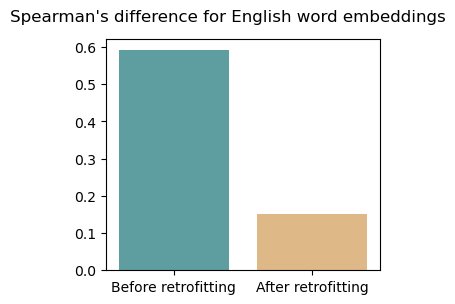

In [154]:
names = ['Before retrofitting', 'After retrofitting']
values = [spearman_non_ret_eng, spearman_ret_eng]

plt.figure(figsize=(12, 3))

plt.subplot(132)
plt.bar(names, values, color =['cadetblue', 'burlywood'])

plt.suptitle("Spearman's difference for English word embeddings")
plt.show()

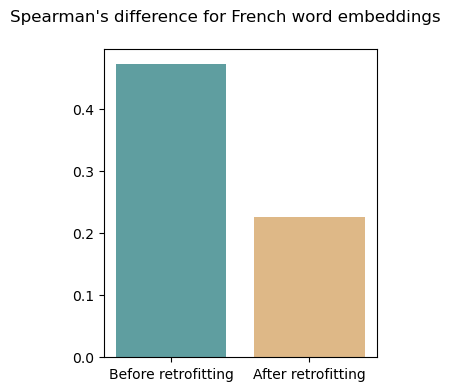

In [153]:
names = ['Before retrofitting', 'After retrofitting']
values = [spearman_non_ret_fre_100, spearman_ret_fre_100]

plt.figure(figsize=(12, 4))

plt.subplot(132)
plt.bar(names, values, color =['cadetblue', 'burlywood'])

plt.suptitle("Spearman's difference for French word embeddings")
plt.show()

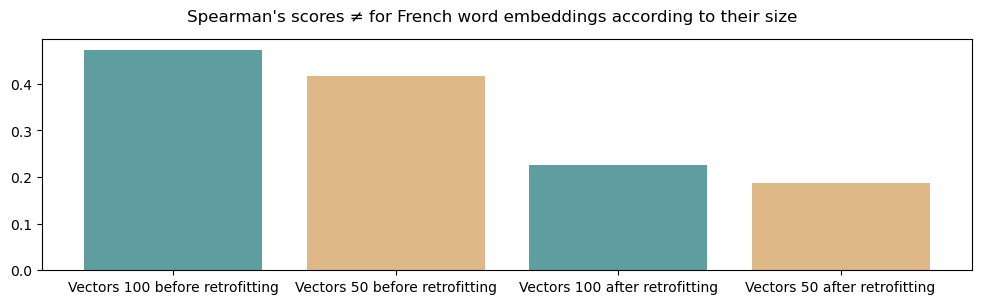

In [144]:
names_bf = ['Vectors 100 before retrofitting', 'Vectors 50 before retrofitting']
values_bf = [spearman_non_ret_fre_100, spearman_non_ret_fre_50]

names_af = ['Vectors 100 after retrofitting', 'Vectors 50 after retrofitting' ]
values_af = [spearman_ret_fre_100, spearman_ret_fre_50]

plt.figure(figsize=(12, 3))

plt.bar(names_bf, values_bf, color =['cadetblue', 'burlywood'])
plt.bar(names_af, values_af,color =['cadetblue', 'burlywood'])

plt.suptitle("Spearman's scores ≠ for French word embeddings according to their size")
plt.show()

### 2.2 Pearson

In [44]:
#convert values from string to float
hum_score_eng = [float(value) for value in (hum_score_eng)]
#compute the pearson correlation coefficient and the p_value between human ratings and non-retrofitted vectors
pearson_non_ret_eng, p_value_non_ret_eng = pearsonr(hum_score_eng, cos_non_ret_eng)

#print results
print("The Pearson correlation coefficient for english (using non-retrofitted vectors : ", round(pearson_non_ret_eng, 4))
print("p_value: ", round(p_value_non_ret_eng, 4))

print("")

#convert values from string to float
hum_score_fre = [float(value) for value in (hum_score_fre)]
#compute the pearson correlation coefficient and the p_value
pearson_non_ret_fre_100, p_value_non_ret_fre_100 = pearsonr(hum_score_fre, cos_non_ret_fre_100)

print("")
#print results
print("The Pearson correlation coefficient for french (using non-retrofitted vectors (100)): ", round(pearson_non_ret_fre_100, 4))
print("p_value: ", round(p_value_non_ret_fre_100, 4))


pearson_non_ret_fre_50, p_value_non_ret_fre_50 = pearsonr(hum_score_fre, cos_non_ret_fre_50)

print("")
#print results
print("The Pearson correlation coefficient for french (using non-retrofitted vectors (50)): ", round(pearson_non_ret_fre_50, 4))
print("p_value: ", round(p_value_non_ret_fre_50, 4))


The Pearson correlation coefficient for english (using non-retrofitted vectors :  0.5606
p_value:  0.0


The Pearson correlation coefficient for french (using non-retrofitted vectors (100)):  0.5209
p_value:  0.0

The Pearson correlation coefficient for french (using non-retrofitted vectors (50)):  0.4456
p_value:  0.0002


In [45]:
#compute the pearson correlation coefficient and the p_value between human ratings and retrofitted vectors
pearson_ret_eng, p_value_ret_eng = pearsonr(hum_score_eng, cos_ret_eng)

#print results
print("The Pearson correlation coefficient for english (using retrofitted vectors : ", round(pearson_ret_eng, 4))
print("p_value: ", round(p_value_ret_eng, 4))

pearson_ret_fre_100, p_value_ret_fre_100 = pearsonr(hum_score_fre, cos_ret_fre_100)

#print results
print("The Pearson correlation coefficient for french (using retrofitted vectors (100): ", round(pearson_ret_fre_100, 4))
print("p_value: ", round(p_value_ret_fre_100, 4))


pearson_ret_fre_50, p_value_ret_fre_50 = pearsonr(hum_score_fre, cos_ret_fre_50)

#print results
print("The Pearson correlation coefficient for french (using retrofitted vectors (50) : ", round(pearson_ret_fre_50, 4))
print("p_value: ", round(p_value_ret_fre_50, 4))


The Pearson correlation coefficient for english (using retrofitted vectors :  0.1908
p_value:  0.0003
The Pearson correlation coefficient for french (using retrofitted vectors (100):  0.3891
p_value:  0.0014
The Pearson correlation coefficient for french (using retrofitted vectors (50) :  0.3144
p_value:  0.0107


# ≠ des scores Pearson avant et après retrofitting

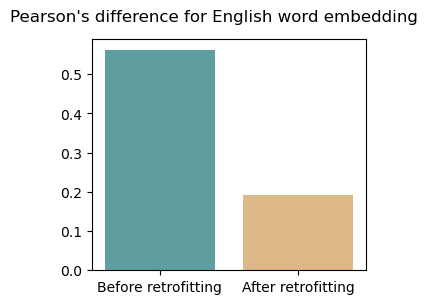

In [152]:
names = ['Before retrofitting', 'After retrofitting']
values = [pearson_non_ret_eng, pearson_ret_eng]

plt.figure(figsize=(12, 3))

plt.subplot(132)
plt.bar(names, values, color=['cadetblue', 'burlywood'])

plt.suptitle("Pearson's difference for English word embedding")
plt.show()

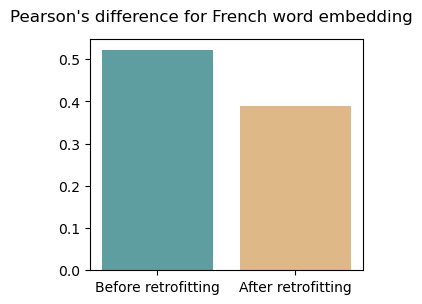

In [151]:
names = ['Before retrofitting', 'After retrofitting']
values = [pearson_non_ret_fre_100, pearson_ret_fre_100]

plt.figure(figsize=(12, 3))

plt.subplot(132)
plt.bar(names, values, color=['cadetblue', 'burlywood'])

plt.suptitle("Pearson's difference for French word embedding")
plt.show()

In [125]:
matplotlib.colors.cnames 

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

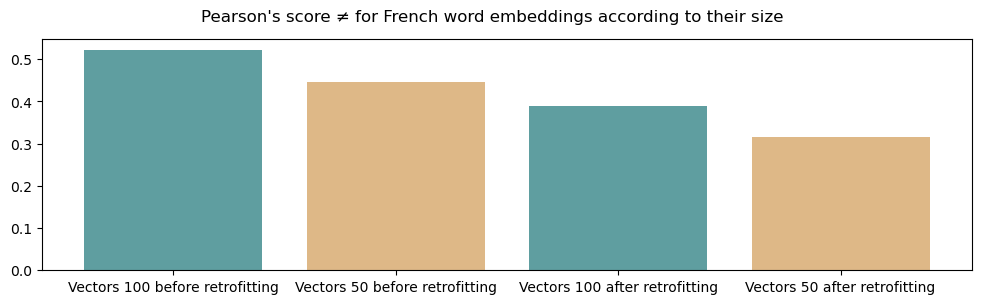

In [146]:
names_bf = ['Vectors 100 before retrofitting', 'Vectors 50 before retrofitting']
values_bf = [pearson_non_ret_fre_100, pearson_non_ret_fre_50]

names_af = ['Vectors 100 after retrofitting', 'Vectors 50 after retrofitting' ]
values_af = [pearson_ret_fre_100, pearson_ret_fre_50]

plt.figure(figsize=(12, 3))

plt.bar(names_bf, values_bf, color =['cadetblue', 'burlywood'])
plt.bar(names_af, values_af, color =['cadetblue', 'burlywood'])

plt.suptitle("Pearson's score ≠ for French word embeddings according to their size")
plt.show()